# Telco Customer Churn

This database is available at <a href = "https://www.kaggle.com/blastchar/telco-customer-churn" target = "_blank">this link</a>.

The focus is to predict behaviour to retain customers.

First of all, we start reading the database.

In [1]:
import pandas as pd

df = pd.read_csv("db/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Preprocessing steps

First of all, we must preprocess the entries in the database.
- Remove unnecessary columns
- Check for missing values and delete their rows
- Search if there is unformatted data
- Check the data type of each column
- Remove duplicates
- Transform categorical columns (using Hamming distance or not)
- Check the number of entries in each class

In [3]:
df.drop("customerID", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


First, we removed the column "customerID" since it does not contain relevant information to the model.

***

We can also observe that there are not empty values in the database.

***

Searching for unformatted data and wrong data.

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


We found out that there were entries with unreasonable values, such as the total charge was a blank space, and then we removed those lines.

***

Note that there are many data types that need to be transformed and we will do it next.

In [5]:
df.loc[[0, 1, 2]]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
import numpy as np

df["SeniorCitizen"] = df["SeniorCitizen"].astype(np.int8)
df["tenure"] = df["tenure"].astype(np.int8)
df["MonthlyCharges"] = df["MonthlyCharges"].astype(np.float32)
df["TotalCharges"] = df["TotalCharges"].astype(np.float32)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int8   
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int8   
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


We have converted the data types to more reasonable formats

***

Now, we search for duplicates

In [7]:
print("Number of duplicates:", sum(df.duplicated()))
df.drop_duplicates(inplace = True)
#df.info()

Number of duplicates: 22


There were 22 lines duplicated and we removed them.

***

The next step is to transform the binary categorical columns as we do next.

In [8]:
for col in df.columns:
    print(df[col].unique())

df["gender"].replace({"Male" : 0, "Female" : 1}, inplace = True)
df["gender"] = df["gender"].astype(np.int8)

df[["Partner", "Dependents"]] = df[["Partner", "Dependents"]].replace({"No" : 0, "Yes" : 1})
df[["Partner", "Dependents"]] = df[["Partner", "Dependents"]].astype(np.int8)

df["PhoneService"].replace({"No" : 0, "Yes" : 1}, inplace = True)
df["PhoneService"] = df["PhoneService"].astype(np.int8)

#df.iloc[:, 10 : 13] = df.iloc[:, 10 : 13].replace({"No" : 0, "Yes" : 1})
#df.iloc[:, 10 : 13] = df.iloc[:, 10 : 13].astype(np.int8)

df["PaperlessBilling"].replace({"No" : 0, "Yes" : 1}, inplace = True)
df["PaperlessBilling"] = df["PaperlessBilling"].astype(np.int8)

df["Churn"].replace({"No" : 0, "Yes" : 1}, inplace = True)
df["Churn"] = df["Churn"].astype(np.int8)

df.info()

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -

***

Lastly, we will check how the class are distributed.

In [9]:
pd.DataFrame(df["Churn"].value_counts())

,Churn
0,5153
1,1857


The class "0" means the customer is still with the company's services and "1" the customer cancelled. We can see that the classes are unbalanced but there are "enough" elements in each one of them.

## Exploratory Data Analysis

First of all, we can observe some relevant information regarding the database

In [10]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.495720,0.162767,0.484023,0.299429,32.520399,0.902996,0.593153,64.888664,2290.353516,0.264907
std,0.500017,0.369180,0.499780,0.458041,24.520441,0.295985,0.491281,30.064768,2266.820801,0.441315
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.799999,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.750000,408.312500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.400002,1403.875000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,89.900002,3807.837524,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.799805,1.000000


Now we take a look in the correlation matrix.

Maximum correlation for column gender is: 0.01236109825294622
Maximum correlation for column SeniorCitizen is: 0.21913077586297078
Maximum correlation for column Partner is: 0.4512537900954197
Maximum correlation for column Dependents is: 0.4512537900954197
Maximum correlation for column tenure is: 0.825293018229667
Maximum correlation for column PhoneService is: 0.2496252326114984
Maximum correlation for column PaperlessBilling is: 0.3509001571818649
Maximum correlation for column MonthlyCharges is: 0.6505400607470728
Maximum correlation for column TotalCharges is: 0.825293018229667
--------------------------------------------------------------------------------
List of correlations that are greater or equal to the threshold: 0.6


[['tenure', 'TotalCharges'],
 ['MonthlyCharges', 'TotalCharges'],
 ['TotalCharges', 'tenure'],
 ['TotalCharges', 'MonthlyCharges']]

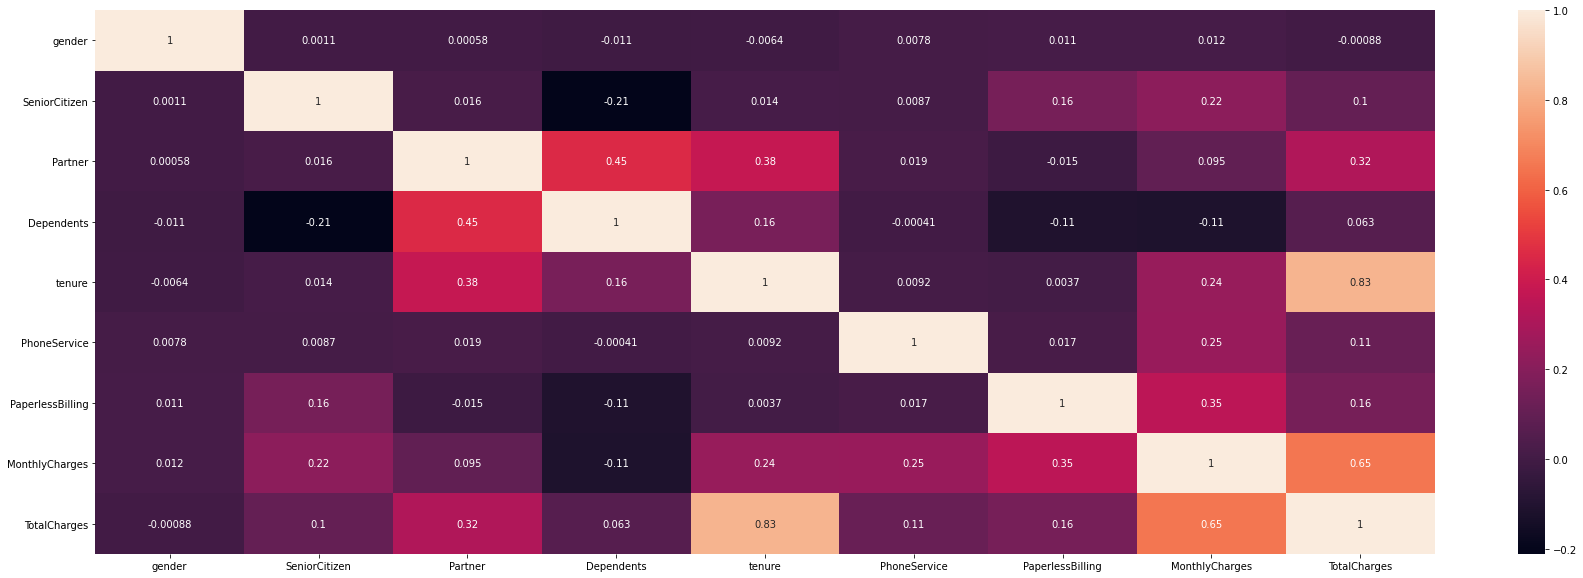

In [11]:
import math
import seaborn as sb
import matplotlib.pyplot as plt

df_corr = df.drop("Churn", axis = 1).corr()

#display(df_corr)
plt.figure(figsize = (30, 10))
sb.heatmap(df_corr, annot = True)

threshold = 0.6
corr_list = []

for row in df_corr.columns:
    idx = None
    max_corr = 0
    for col in df_corr.columns:
        if(row != col):
            if(abs(df_corr.loc[row, col]) > max_corr):
                max_corr = abs(df_corr.loc[row, col])
                idx = col

            if(abs(df_corr.loc[row, col]) >= threshold):
                corr_list.append([row, col])
    
    print("Maximum correlation for column", row, "is:", max_corr)

print("-" * 80)

print("List of correlations that are greater or equal to the threshold:", threshold)
display(corr_list)

We can observe that there are a diversity of columns that have a relevant correlation with other columns and we may explore this.

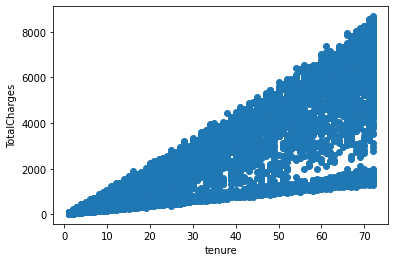

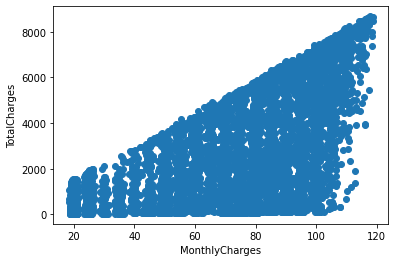

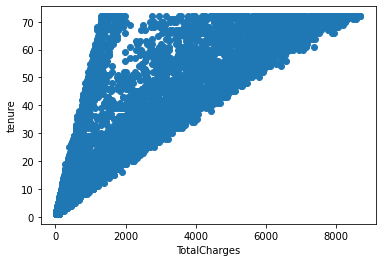

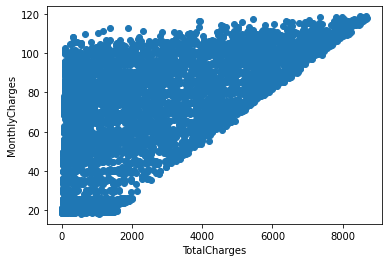

In [12]:
for i in range(len(corr_list)):
    plt.figure()
    plt.scatter(x = df[corr_list[i][0]], y = df[corr_list[i][1]])
    plt.xlabel(corr_list[i][0])
    plt.ylabel(corr_list[i][1])
    plt.show()

***

Other exploratory analysis we may consider:
- Group customers by tenure and try to relate the it with the churn
- Explore the relationship with the churn and the presence of partner and dependents
- It would also be interesting to look for the payment method and the churn
- Further, we can also explore the relation of the paperless billing and the type of contract to predict the churn

***

### Data distribution and Outliers

It is interesting to observe the existence of outliers and also the distribution of the entries, as we do next.

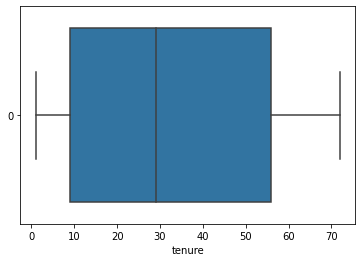

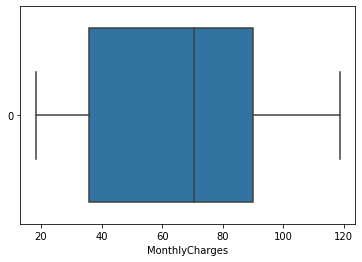

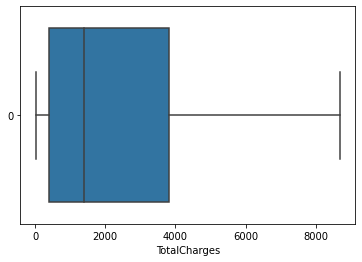

In [13]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure()
    sb.boxplot(data = df[col], orient = "h")
    plt.xlabel(col)

It is possible to observe that the data are relatively well distributed for tenure and monthly charges but for the total charges we observe that the major part of the entries are concentrated under 4000. There were not outliers in these three graphics.

***

Now, we will observe the data distribution over the features.

<Figure size 432x288 with 0 Axes>

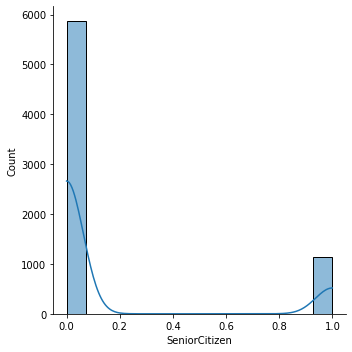

In [14]:
cols = df.columns[1:2]

for col in cols:
    plt.figure()
    sb.displot(df[col], kde = True)
    plt.xlabel(col)

From the distribuiton graphics, we can observe that some features have an (almost) balanced distribution among the entries. We can also observe that for "Senior Citizen", the major part of the data is concentred in "0" or "No" and the same happens to "Dependents". Then, we explore some specific features and the churn to in order to find smaller groups that have a greater chance to cancel the services.

### Histograms

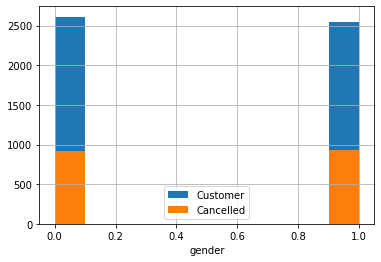

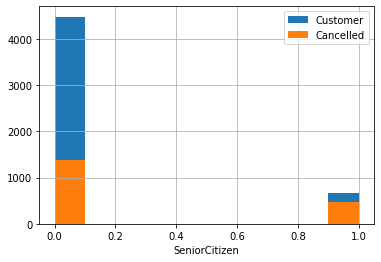

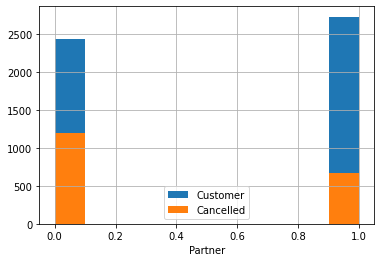

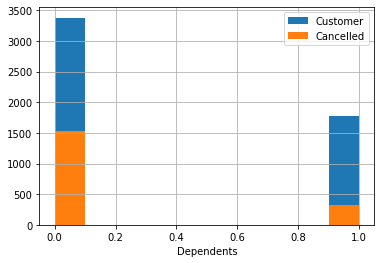

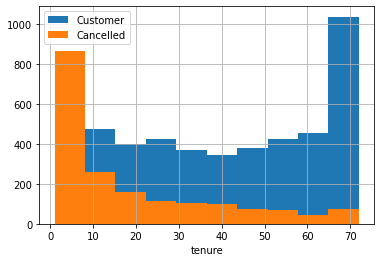

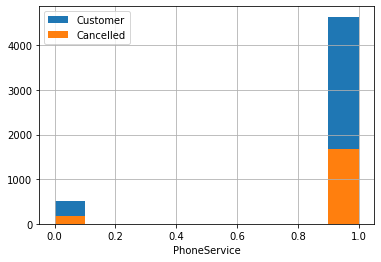

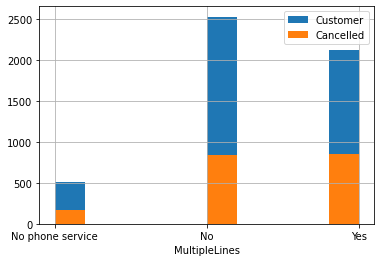

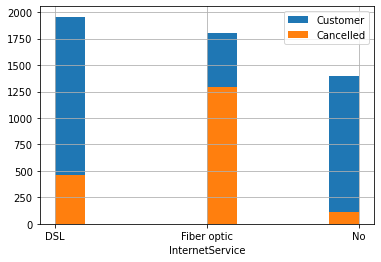

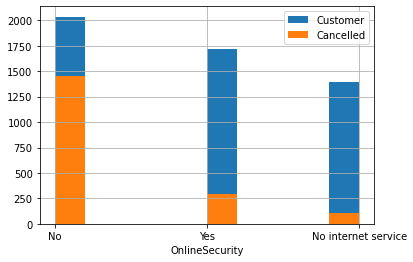

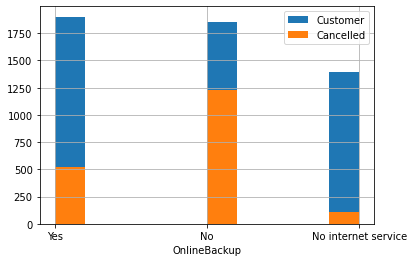

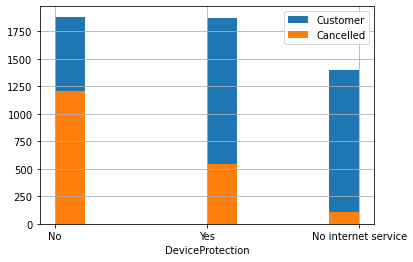

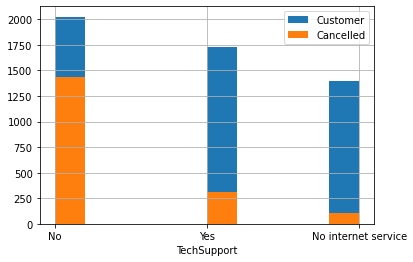

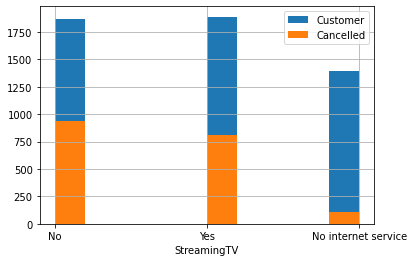

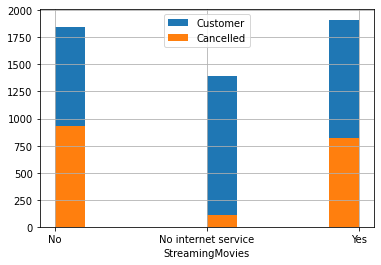

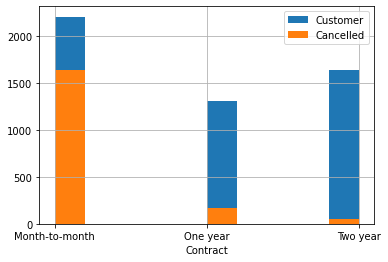

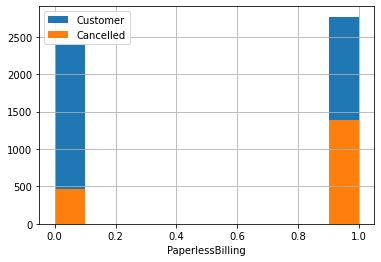

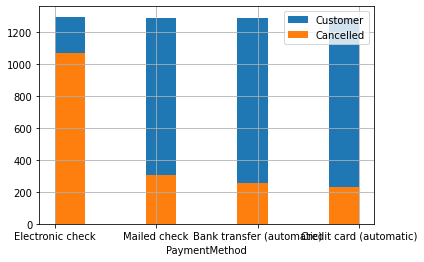

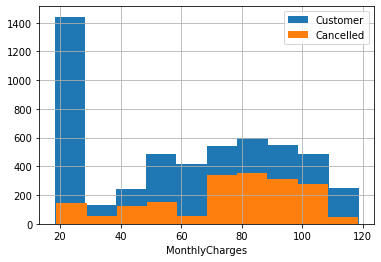

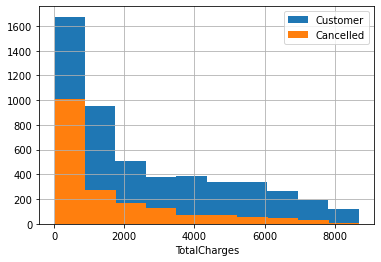

In [15]:
#df.hist()
#df.plot.hist(bins = 2)

dfg = df.groupby("Churn")

for col in df.columns[:-1]:
    plt.figure()
    dfg[col].hist(legend = True)
    plt.xlabel(col)
    plt.legend(("Customer", "Cancelled"))
    plt.show()

From these histograms, we observe that most of the cancelled contratcs have the following characteristcs
- Tenure: < 10
- Internet Service: Fibre Optic
- Online Security: No
- Online Backup: No
- Device Protection: No
- Tech Support: No
- Contract: Month-to-month
- Paperless Billing: Yes
- Payment Method: Eletronic Check

Then, the closer customers get to these characteristics, It is greater the chance they can cancel their services.

## Training model

Now, we will train a model to predict churn. In order to do this, we will convert the multivalued categorical column into numeric ones (one-hot-encoding).

In [16]:
df = pd.get_dummies(data = df, columns = ["MultipleLines"])
df = pd.get_dummies(data = df, columns = ["InternetService"])
df = pd.get_dummies(data = df, columns = ["OnlineSecurity"])
df = pd.get_dummies(data = df, columns = ["OnlineBackup"])
df = pd.get_dummies(data = df, columns = ["DeviceProtection"])
df = pd.get_dummies(data = df, columns = ["TechSupport"])
df = pd.get_dummies(data = df, columns = ["StreamingTV"])
df = pd.get_dummies(data = df, columns = ["StreamingMovies"])
df = pd.get_dummies(data = df, columns = ["Contract"])
df = pd.get_dummies(data = df, columns = ["PaymentMethod"])

Now, we must split the dataset in two. The first is the training set that we will use to train the machine learning model and the second one is the test set that we will be used to measure the performance of our model.

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, stratify = df["Churn"].tolist(), test_size = 0.25, random_state = 27)

***

### Standardize data

We will reduce the number of dimensions (features) of the database and prior to do that we must standardize it. This step is needed because many machine learning algorithms and models are sensible to the scale of the input data and they better perform under scaled data.

In [18]:
from sklearn.preprocessing import StandardScaler

# initialize
scaler = StandardScaler()

# Note that the fit must be done only in the training set,
# but the transform is done in both the train and the test sets.

# train (training set only)
scaler.fit(train.drop("Churn", axis = 1))

# transform (train and test sets) (reset index)
train_scaled = pd.DataFrame(scaler.transform(train.drop("Churn", axis = 1)))
test_scaled = pd.DataFrame(scaler.transform(test.drop("Churn", axis = 1)))

# join the classes
train_scaled = train_scaled.join(train["Churn"].reset_index(drop = True))
test_scaled = test_scaled.join(test["Churn"].reset_index(drop = True))

### Model

Now, we will use two different algorithms and measure their performance prior to reduce the number of dimensions (features) of the data set.

The first algorithm is the Random Forest classifier.

In [19]:
from os import cpu_count
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
train = []
test = []
# initialize model
rf = RandomForestClassifier(n_jobs = cpu_count(), random_state = 27)

# train
rf.fit(train_scaled.drop("Churn", axis = 1), train_scaled["Churn"])

# predict
rf_pred = rf.predict(test_scaled.drop("Churn", axis = 1))

# evaluate
cmrf = pd.DataFrame(confusion_matrix(test_scaled["Churn"], rf_pred))

print("Confusion matrix")
display(cmrf)
print("Accuracy: {0:1.5f}".format((cmrf.loc[0, 0] + cmrf.loc[1, 1]) / cmrf.sum().sum()))

Confusion matrix


,0,1
0,1169,120
1,227,237


Accuracy: 0.80205


***

Another approach is to use the Support Vector Machine (SVM) model, as follows.

In [20]:
from sklearn.svm import LinearSVC

# initialize
lsvm = LinearSVC(max_iter = 2000, random_state = 27)

# train
lsvm.fit(train_scaled.drop("Churn", axis = 1), train_scaled["Churn"])

# predict
lsvm_pred = lsvm.predict(test_scaled.drop("Churn", axis = 1))

# evaluate
cmsvm = pd.DataFrame(confusion_matrix(test_scaled["Churn"], lsvm_pred))

print("Confusion matrix (reduced dimensionality)")
display(cmsvm)
print("Accurary: {0:1.5f}".format((cmsvm.loc[0, 0] + cmsvm.loc[1, 1]) / cmsvm.sum().sum()))

Confusion matrix (reduced dimensionality)


,0,1
0,1156,133
1,209,255


Accurary: 0.80491


***

### Dimensionality Reduction

Now, we will intend to perform a dimensionality reduction using the algorithm PCA (Principal Component Analysis).
We set the number of components to cover 99% of the variante ratio. This algorithm receives correlated (or not) data and sumarize it in noncorrelated axis.

In [21]:
from sklearn.decomposition import PCA
#from sklearn.decomposition import IncrementalPCA

# initialize
pca = PCA(n_components = 0.99, svd_solver = 'full')

# train (training set only)
pca.fit(train_scaled.drop("Churn", axis = 1))

# variance of the components
#print(pca.explained_variance_)
print("Sum of explained variance ratio:", pca.explained_variance_ratio_.sum())

# number of components
print("Number of selected components", pca.n_components_)

# apply dimensionality reduction (train and test sets) (reset index)
train_reduced = pd.DataFrame(pca.transform(train_scaled.drop("Churn", axis = 1)))
test_reduced = pd.DataFrame(pca.transform(test_scaled.drop("Churn", axis = 1)))

# join the classes (reset_index is not needed since train and test scale are already reseted)
train_reduced = train_reduced.join(train_scaled["Churn"])
test_reduced = test_reduced.join(test_scaled["Churn"])

Sum of explained variance ratio: 0.9985238
Number of selected components 21


We can observe that with only 21 features, which is almost half of them, we explain at least 99% of the explained variance, hence we can build a simpler and faster (more efficient) model.

***

Now, we use the dimensionality reduced dataset. We start with the Random Florest Classifier model.

In [22]:
# initialize model
rf_reduced = RandomForestClassifier(n_jobs = cpu_count(), random_state = 27)

# train
rf_reduced.fit(train_reduced.drop("Churn", axis = 1), train_reduced["Churn"])

# predict
rf_reduced_pred = rf_reduced.predict(test_reduced.drop("Churn", axis = 1))

# evaluate
rfcm_reduced = pd.DataFrame(confusion_matrix(test_reduced["Churn"], rf_reduced_pred))

print("Confusion matrix (reduced dimensionality)")
display(rfcm_reduced)
print("Accuracy: {0:1.5f}".format((rfcm_reduced.loc[0, 0] + rfcm_reduced.loc[1, 1]) / rfcm_reduced.sum().sum()))

Confusion matrix (reduced dimensionality)


,0,1
0,1180,109
1,259,205


Accuracy: 0.79007


***

Another approach is to use the Support Vector Machine (SVM) model, as follows.

In [23]:
from sklearn.svm import LinearSVC

# initialize
lsvm = LinearSVC(max_iter = 2000, random_state = 27)

# train
lsvm.fit(train_reduced.drop("Churn", axis = 1), train_reduced["Churn"])

# predict
lsvm_pred = lsvm.predict(test_reduced.drop("Churn", axis = 1))

# evaluate
lsvmcm_reduced = pd.DataFrame(confusion_matrix(test_reduced["Churn"], lsvm_pred))

print("Confusion matrix (reduced dimensionality)")
display(lsvmcm_reduced)
print("Accuracy: {0:1.5f}".format((lsvmcm_reduced.loc[0, 0] + lsvmcm_reduced.loc[1, 1]) / lsvmcm_reduced.sum().sum()))

Confusion matrix (reduced dimensionality)


,0,1
0,1161,128
1,208,256


Accuracy: 0.80833


## Summary

In summary, we identified some characteristic that the customer has a greater chance to cancel its services. We also have algorithms that can predict if it will happen a churn prediction or not with accuracy greater than or equal to 79%.

In order to circumvent the evasion of clients, we can develop some programs that guide the customers in the opposite direction of the "churn profile". Some examples would be:

- Offer a trial of both the online security and the online backup services
- Incentivate the acquistion of a annual contract
- Change the payment method to an automatic one (offer some discounts)